**MNIST Handwritten Digit Classification using Deep Learning(Neural Network)**

In [1]:
#Importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  #Open CV library for image preprocessing
from google.colab.patches import cv2_imshow   #for displaying image
from PIL import Image   #Pillow library for image preprocessing
import tensorflow as tf   #tensorflow developed by google , pytorch developed by Facebook
tf.random.set_seed(3) # to get same result for each time we run NN to solve problem of randomness of NN
from tensorflow import keras #wrapper of tensorflow (DL library)
from keras.datasets import mnist #dataset of handwritten digits
from tensorflow.math import confusion_matrix #to get confusion matrix

**Loading MNIST data from keras dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Images are already in numpy array
type(X_train)

numpy.ndarray

In [4]:
#X_train : 60,000 samples of training images having dimesnsions 28 * 28
#y_train: corresponding 60,000 labels which contains actual digits
#X_test: 10,000 samples of test images having dimesnsion is 28 * 28
#y_test: corresponding labels of 10,000 samples which contains actual digits
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60,000
Testing data= 10,000
Image Dimension ->  28*28
GrayScale Image -> 1 channel

In [5]:
#Printing 10th Image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
# shape of image
print(X_train[10].shape)

(28, 28)


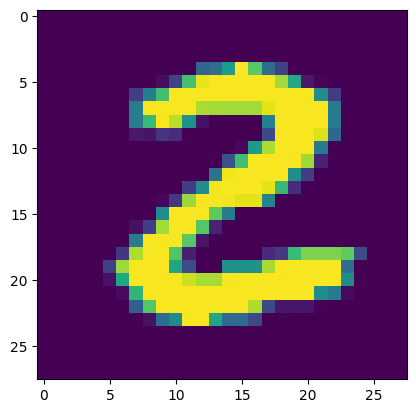

2


In [9]:
# Display 10th image
plt.imshow(X_train[25])
plt.show()

#print corresponding label
print(y_train[25])

#This is a gray scale image and color is showing by matplotlib library. this dataset does not have coloured image otherwise it shows channel as 3

Image Labels

In [10]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [11]:
#print unique values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [12]:
#print unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


We can use these labels as given or we can also apply one hot encoding like below eg
0 - 1 0 0 0 0 0 0 0 0 0
1-  0 1 0 0 0 0 0 0 0 0

All images have same dimensions in this dataset, if not we have to resize all images to a common dimension

# images are in the range values 0 to 255. scale the image by applying standardization to range it in 0 to 1(Normalize)

In [13]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [14]:
#Printing 10th Image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the simple Neural Network (Not using Convolutional Neural Network - for image recognition here)

In [15]:
# Setting up the layers of the NN (cannot feed the data into 2-D array or matrix form (28*28))
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)), # For input layer to convert it into 1-D array, for RGB image(28,28,3)
                          keras.layers.Dense(50,activation='relu'), #Hidden Layer1 : rectified linear unit
                          keras.layers.Dense(50,activation='relu'), #Hidden Layer2 : rectified linear unit
                          keras.layers.Dense(10,activation='sigmoid') #Output Layer : 10 classes of digits, so 10 neurons as first parameter
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
#compiling neural network
model.compile(optimizer='adam',  # determine most optimum value for parameter
              loss='sparse_categorical_crossentropy', #as labels are numeric for OHE: use categorical_crossentropy
              metrics=['accuracy'])

In [17]:
# Training neural network
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8550 - loss: 0.5190
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9557 - loss: 0.1492
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9680 - loss: 0.1052
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9750 - loss: 0.0822
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9788 - loss: 0.0657
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9835 - loss: 0.0531
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9856 - loss: 0.0452
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9879 - loss: 0.0384
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9898 - loss: 0.0325
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9901 - loss: 0.0305


Training Data Accuracy=99%

Evaluate NN i.e Accuracy on Test Data




In [18]:
loss, accuracy = model.evaluate(X_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9611 - loss: 0.1490
0.965399980545044


Testing Data Accuracy=96.53%

In [19]:
print(X_test.shape)


(10000, 28, 28)


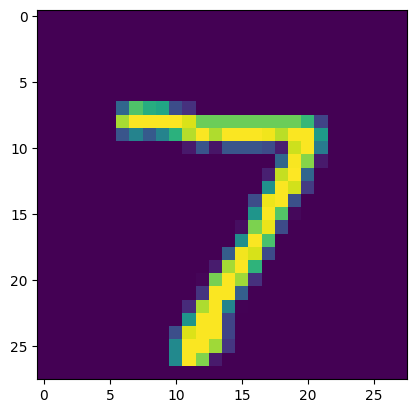

In [20]:
#display first data point in test data X_test
plt.imshow(X_test[0])
plt.show()

In [21]:
#corresponding label
print(y_test[0])

7


In [22]:
# Check individual predictions of my model
Y_pred=model.predict(X_test)
print(Y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
(10000, 10)


In [23]:
#printing for only one label i.e 0th . It gives probability of each label [0-9]
print(Y_pred[0])

[2.1429693e-03 4.4505149e-03 5.8162134e-02 9.0023381e-01 3.1043746e-07
 3.5193057e-03 3.8535519e-11 9.9999952e-01 2.3221244e-05 9.0280104e-01]


model.predict() gives prediction probability of each class for that data point

In [24]:
#converting prediction probabilities to class labels. value at index 7 is maximum so we get 7 number
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [25]:
#converting prediction probability to class labels for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(2), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

y_test --> True labels
Y_pred_labels --> Predicted labels by NN

Confusion Matrix

In [26]:
confusion_mat = confusion_matrix(y_test,Y_pred_labels)
print(confusion_mat)

tf.Tensor(
[[ 952    1    1    0    3    0    3    0    2   18]
 [   0 1112    4    2    5    1    3    1    7    0]
 [   3    0 1000    7    5    1    4    6    6    0]
 [   0    0    2  976    1    9    0    7    4   11]
 [   0    0    0    0  968    1    3    0    2    8]
 [   3    0    0   24    2  843    6    0   11    3]
 [   3    2    1    1   18    3  927    1    1    1]
 [   2    2   10    5    7    0    0  986    3   13]
 [  10    1    5   11    5    6    4    1  916   15]
 [   0    2    0    3   27    3    0    2    3  969]], shape=(10, 10), dtype=int32)


To understand this confusion matrix we will use heatmap

Text(0.5, 47.7222222222222, 'Predicted Labels')

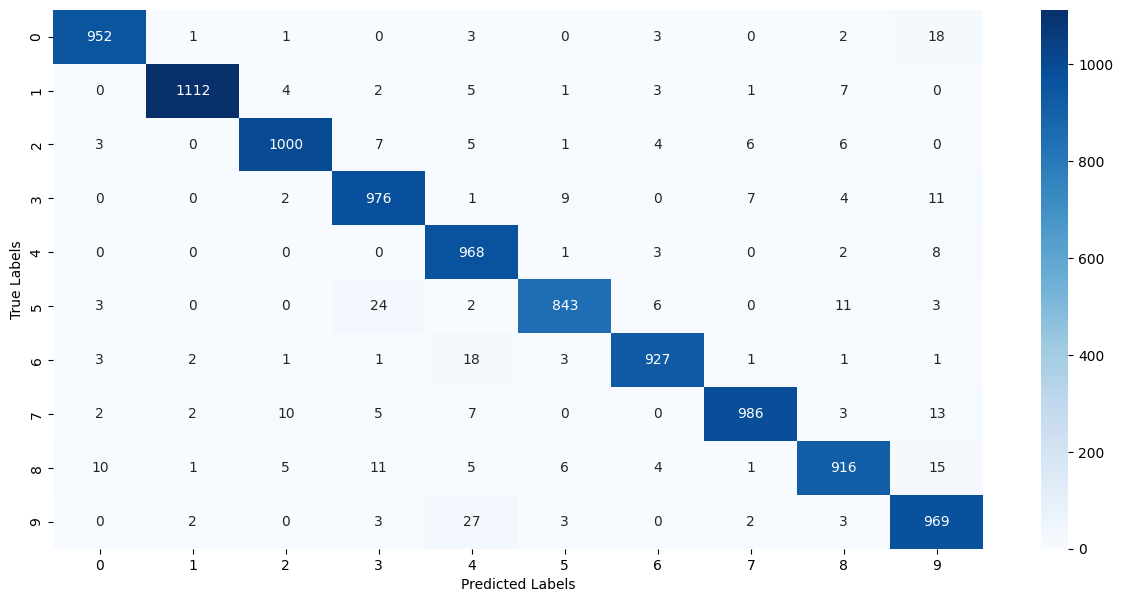

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Blues')  # d -- values are in integers
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
#Build Predictive System

In [28]:
input_image_path= '/content/MNIST_digit.png'

input_image=cv2.imread(input_image_path)

In [29]:
type(input_image)

numpy.ndarray

In [30]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


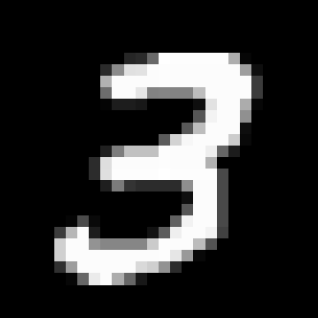

In [31]:
cv2_imshow(input_image)

In [32]:
# This image is in different dimension and also it is RGB image mention by 3rd parameter
#our NN is trained on 28 * 28 and also it is gray scale
input_image.shape

(318, 318, 3)

In [33]:
#convert this image into gray scale image
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(318, 318)

In [35]:
#convert input image for prediction is in dimension 28*28
input_image_resize=cv2.resize(grayscale,(28,28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

In [38]:
#scaling the values in between 0 to 1
input_image_resize=input_image_resize/255

In [39]:
type(input_image_resize)

numpy.ndarray

In [40]:
#tell NN giving only 1 input image of size(28,28) for prediction and not whole test data
# For RGB: [1,28,28,3]
image_reshaped=np.reshape(input_image_resize,[1,28,28])

In [41]:
#now use model for prediction
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1.2789285e-07 3.0773788e-06 2.7406910e-03 1.0000000e+00 6.6153994e-08
  8.4446583e-05 3.0343278e-14 3.0780668e-04 3.1177428e-02 9.8130357e-01]]


In [43]:
#converting above prob value into class labels
input_pred_label=np.argmax(input_prediction)
input_pred_label

np.int64(3)

**Final Predictive System**

Enter path of image to be predicted:/content/MNIST_digit.png


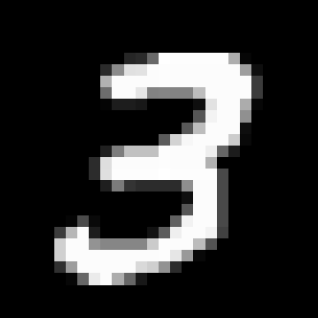

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
 Handwritten Digit is recognized as : 3


In [44]:
#combine Final Predictive System at one line

input_image_path= input("Enter path of image to be predicted:")

input_image=cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

input_image_resize=cv2.resize(grayscale,(28,28))

input_image_resize=input_image_resize/255

image_reshaped=np.reshape(input_image_resize,[1,28,28])  # Tell NN for predicting only 1 input image

input_prediction=model.predict(image_reshaped)

input_pred_label=np.argmax(input_prediction)

print(" Handwritten Digit is recognized as :",input_pred_label)